# project:Investigate a dataset (tmdb_movies dataset)
**Table of contents**
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions



## Introduction
**overview**
In order to complete my first project which is the first step to success in nanodegree data analysis, I choose to investigate imdb movie dataset.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.it contains 21 rows.

**Requirenments**

First,we will need to install python and import some libraries/packages such as:
1. Numpy - a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
2. Pandas - a library for the Python programming language, it offers data structures and operations for manipulating numerical tables and time series.
3. Matplotlib - Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy


In [1]:
#import necessaries packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



**Questions to be answered for analysis the data set:**
1. Which movies have the highest and lowest profit? 
2. What is the average runtime for all movies?
3. What is the relation between popularity and revenue?
4. What is the relation between budget and profit?
5. What is the relation between rating and profit?
6. Are there any differences in top 10 movies based on profit , popularity and rating?
7. Who are the top 10 Directors based on rating?
8. Which are the top 20 successfully genres?
9. Who are the most 10 casts appeared ?
10. What is the state of profits during the years?


## Data Wrangling


**General Properties**
let’s load or read the dataset and see upper columns.

In [2]:
#loading the csv file#
tmbd = pd.read_csv('tmdb-movies.csv')
#printing first five rows 
tmbd.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Data cleaning**
 observation regarding (tmbd.info)

We need to clean our data in before by doing the following steps:
1. Removing/dropeed duplicate rows
2. Changing the format of release date into DateTime format.
3. Removing the unused colunms
4. check null rows and delete.

In [4]:
#how many rows are duplicated
tmbd.duplicated().sum()

1

In [5]:
#which row is duplicated
tmbd[tmbd.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
#drop the duplicated row#
tmbd.drop([2090],axis = 0 , inplace = True)

In [7]:
#check for duplicated again#
tmbd.duplicated().sum()

0

In [8]:
#changing release_data format to datetime format
tmbd['release_date'] = pd.to_datetime(tmbd['release_date'])
tmbd['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [9]:
#Check for null dataset
tmbd.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#drop unecessary columns
#del_col= ['imdb_id','homepage','keywords','tagline','budget_adj','revenue_adj', 'overview'],
tmbd.drop(columns=['imdb_id', 'homepage','tagline', 'keywords', 'overview', 'budget_adj','revenue_adj'],inplace = True)
tmbd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

In [11]:
#Check for zero runtime
tmbd[tmbd['runtime'] == 0].index.values
#tmbd[tmbd['runtime'] == 0]

array([  92,  334,  410,  445,  486,  595,  616, 1241, 1289, 1293, 1849,
       2315, 2370, 3329, 3794, 3857, 3884, 4063, 4138, 4829, 4944, 5216,
       5695, 5920, 5938, 5992, 6040, 6383, 6552, 6934, 8874], dtype=int64)

In [12]:
#Drop rows where runtime equals to zero
tmbd.drop(labels= [92,334,410,445,486,595,  616, 1241, 1289, 1293, 1849,
       2315, 2370, 3329, 3794, 3857, 3884, 4063, 4138, 4829, 4944, 5216,
       5695, 5920, 5938, 5992, 6040, 6383, 6552, 6934, 8874],inplace = True)

In [13]:
#Check again
tmbd[tmbd['runtime'] == 0].index.values

array([], dtype=int64)

In [14]:
tmbd.head()
tmbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10834 non-null  int64         
 1   popularity            10834 non-null  float64       
 2   budget                10834 non-null  int64         
 3   revenue               10834 non-null  int64         
 4   original_title        10834 non-null  object        
 5   cast                  10758 non-null  object        
 6   director              10792 non-null  object        
 7   runtime               10834 non-null  int64         
 8   genres                10812 non-null  object        
 9   production_companies  9822 non-null   object        
 10  release_date          10834 non-null  datetime64[ns]
 11  vote_count            10834 non-null  int64         
 12  vote_average          10834 non-null  float64       
 13  release_year    

## Exploratory Data Analysis
We will now answering our questions that we have been asked in Introduction section by computing statistics and create visualizations.

### Movies earned the highest and lowest profit

In [15]:
#first we need to calculate profit by substract the budget from revenue
tmbd['profit'] = tmbd['revenue'] - tmbd['budget']
tmbd.tail(100)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
10766,23916,0.591799,0,7185518,Paradise Alley,Sylvester Stallone|Lee Canalito|Armand Assante...,Sylvester Stallone,107,Action|Adventure|Drama,Image Ten,1978-09-22,12,6.0,1978,7185518
10767,13333,0.581236,0,0,Game of Death,Bruce Lee|Kareem Abdul-Jabbar|Chuck Norris|Col...,Robert Clouse,103,Drama|Action|Thriller|Crime,Golden Harvest Company|Concord Productions Inc.,1978-03-22,50,6.4,1978,0
10768,74849,0.573763,0,0,The Star Wars Holiday Special,Harrison Ford|Mark Hamill|Anthony Daniels|Carr...,Steve Binder,97,Adventure|Comedy|Family|Science Fiction|TV Movie,20th Century Fox Television|Smith-Hemion Produ...,1978-12-01,45,3.2,1978,0
10769,26973,0.556161,0,0,Pretty Baby,Brooke Shields|Keith Carradine|Susan Sarandon|...,Louis Malle,110,Drama|History,Paramount Pictures|Synthetic Fur Productions,1978-04-05,20,5.9,1978,0
10770,11327,0.512719,2300000,35000000,Midnight Express,Brad Davis|Irene Miracle|Bo Hopkins|Randy Quai...,Alan Parker,121,Drama|Crime,Columbia Pictures|Casablanca Filmworks,1978-10-06,141,7.5,1978,32700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0


In [16]:
#Movie with the highest profit
tmbd.loc[tmbd['profit'].idxmax()]


id                                                                  19995
popularity                                                       9.432768
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_count                                                           8458
vote_average                                                          7.1
release_year                          

In [17]:
#Movie with the lowest profit
tmbd.loc[tmbd['profit'].idxmin()]

id                                                                  46528
popularity                                                        0.25054
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                          

### The average runtime

In [18]:
# Average runtime for all movies
tmbd['runtime'].mean()

102.3638545320288

The average runtime is 102.36

In [19]:
#specific runtime information
tmbd['runtime'].describe()

count    10834.000000
mean       102.363855
std         30.948225
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Here we can see the minimum,maximum,average and some percentage of runtime.
For example the maximum runtime is 900 minutes while the minimum is 2 minutes

### The relationship between popularity and revenue

In [20]:
# relationship between popularity and revenue (scatter)
#we make a function called scatter_diagram which takes five attributes for plotting
def scatter_diagram(atr1 , atr2 , atr3 , atr4 , atr5 ):
 tmbd.plot(x=atr1,y=atr2,kind='scatter')
 #diagram-title
 plt.title(atr3)
  # x-axis
 plt.xlabel(atr4)
  # y-axis
 plt.ylabel(atr5)


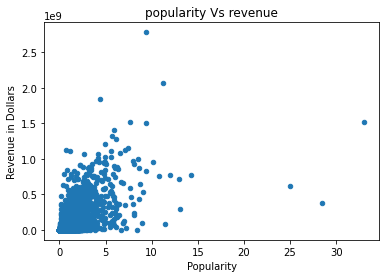

In [21]:
scatter_diagram('popularity','revenue', 'popularity Vs revenue' ,'Popularity' ,'Revenue in Dollars');

The relation between popularity and revenue is positive

### The relationship between budget and profit

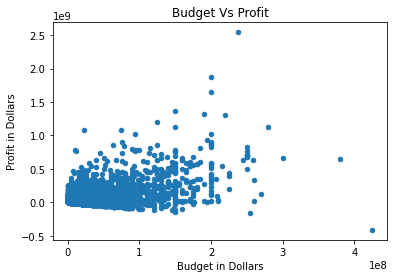

In [22]:
# relationship between budget and profit (scatter)
scatter_diagram('budget','profit','Budget Vs Profit','Budget in Dollars','Profit in Dollars')


There isnt any significant relationship between budget and profit

### The relationship between rating and profit

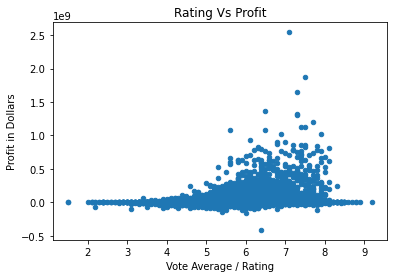

In [23]:
# relationship between rating and profit (scatter)
scatter_diagram('vote_average','profit','Rating Vs Profit','Vote Average / Rating','Profit in Dollars')


Relation between rating and profit is right biased

Now lets see if the top 10 movies based on profit,popularity and rating are the same or not

### Movies based on profit

In [24]:
profit_movie = tmbd.groupby('original_title').mean().profit
profit_movie

original_title
$5 a Day                                     0.0
$9.99                                        0.0
'71                                    1625847.0
(500) Days of Summer                  53222734.0
(T)Raumschiff Surprise - Periode 1           0.0
                                         ...    
ì•„ê¸°ì™€ ë‚˜                                0.0
ì‹ ì˜ í•œ ìˆ˜                                0.0
í¬í™” ì†ìœ¼ë¡œ                          -10000.0
í˜•ì‚¬ Duelist                               0.0
í•˜ìš¸ë§                                     0.0
Name: profit, Length: 10541, dtype: float64

In [25]:
sort_movie = profit_movie.sort_values(ascending=False) 
sort_movie

original_title
Avatar                                          2.544506e+09
Star Wars: The Force Awakens                    1.868178e+09
Jurassic World                                  1.363529e+09
Furious 7                                       1.316249e+09
Harry Potter and the Deathly Hallows: Part 2    1.202818e+09
                                                    ...     
Mars Needs Moms                                -1.110072e+08
The Pacific                                    -1.200000e+08
The Wolfman                                    -1.500000e+08
The Lone Ranger                                -1.657101e+08
The Warrior's Way                              -4.139124e+08
Name: profit, Length: 10541, dtype: float64

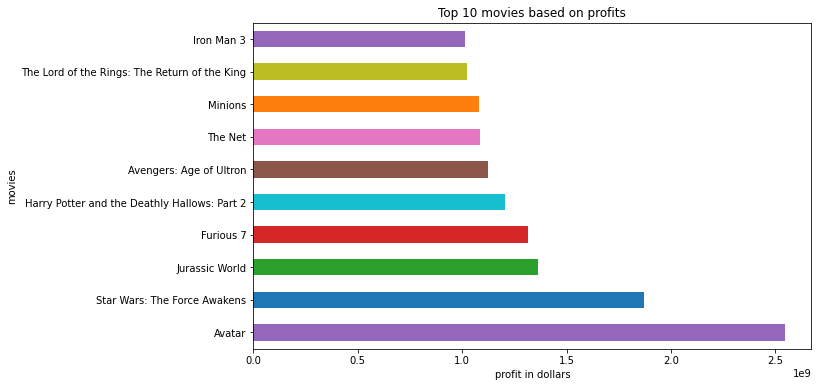

In [26]:
colors = ['#9467bd','#1f77b4', '#2ca02c', '#d62728', '#17becf' ,'#8c564b', '#e377c2', '#ff7f0e', '#bcbd22']
sort_movie.head(10).plot(kind='barh',figsize=(10,6), color= colors)
#diagram-title
plt.title('Top 10 movies based on profits')
# x-axis
plt.xlabel('profit in dollars')
# y-axis
plt.ylabel('movies');


Based on profits the winner movie is avatar with 2.544506e+09 dollars

### Movies based on popularity

In [27]:
popularity_movie = tmbd.groupby('original_title').mean().popularity
popularity_movie

original_title
$5 a Day                              0.298961
$9.99                                 0.204302
'71                                   1.220073
(500) Days of Summer                  3.244139
(T)Raumschiff Surprise - Periode 1    0.712887
                                        ...   
ì•„ê¸°ì™€ ë‚˜                         0.145331
ì‹ ì˜ í•œ ìˆ˜                         0.205343
í¬í™” ì†ìœ¼ë¡œ                        0.507092
í˜•ì‚¬ Duelist                        0.265905
í•˜ìš¸ë§                              0.142769
Name: popularity, Length: 10541, dtype: float64

In [28]:
sort_movies = popularity_movie.sort_values(ascending=False) 
sort_movies

original_title
Jurassic World                32.985763
Mad Max: Fury Road            28.419936
Interstellar                  24.949134
Guardians of the Galaxy       14.311205
Insurgent                     13.112507
                                ...    
Khosla Ka Ghosla!              0.001115
Mon petit doigt m'a dit...     0.000973
G.B.F.                         0.000620
The Hospital                   0.000188
North and South, Book I        0.000065
Name: popularity, Length: 10541, dtype: float64

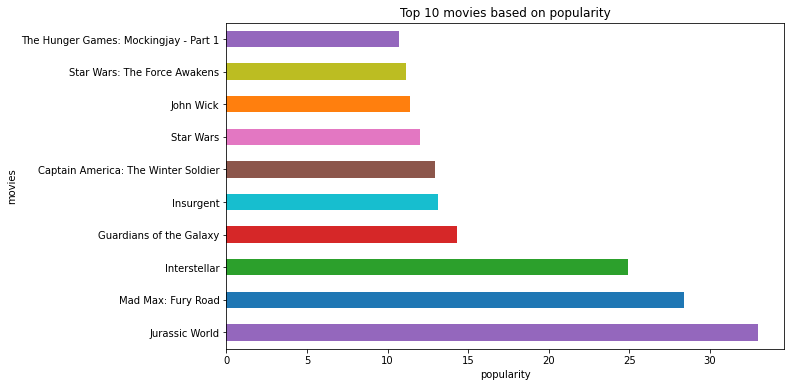

In [29]:
colors = ['#9467bd','#1f77b4', '#2ca02c', '#d62728', '#17becf' ,'#8c564b', '#e377c2', '#ff7f0e', '#bcbd22']
sort_movies.head(10).plot(kind='barh',figsize=(10,6), color= colors)
#diagram-title
plt.title('Top 10 movies based on popularity')
# x-axis
plt.xlabel('popularity')
# y-axis
plt.ylabel('movies');

Based on second criteria popularity,the top 1 movie is Jurassic World with popularity of 32.985763

### Movies based on ratings

In [30]:
rating_movie = tmbd.groupby('original_title').mean().vote_average
rating_movie

original_title
$5 a Day                              5.4
$9.99                                 6.1
'71                                   6.6
(500) Days of Summer                  7.3
(T)Raumschiff Surprise - Periode 1    6.3
                                     ... 
ì•„ê¸°ì™€ ë‚˜                         6.1
ì‹ ì˜ í•œ ìˆ˜                         6.8
í¬í™” ì†ìœ¼ë¡œ                        6.9
í˜•ì‚¬ Duelist                        5.2
í•˜ìš¸ë§                              5.8
Name: vote_average, Length: 10541, dtype: float64

In [31]:
sort_film = rating_movie.sort_values(ascending=False) 
sort_film

original_title
The Story of Film: An Odyssey    9.2
The Mask You Live In             8.9
Black Mirror: White Christmas    8.8
Life Cycles                      8.8
Pink Floyd: Pulse                8.7
                                ... 
Sand Sharks                      2.1
Superbabies: Baby Geniuses 2     2.1
Jurassic Shark                   2.0
Transmorphers                    1.5
Manos: The Hands of Fate         1.5
Name: vote_average, Length: 10541, dtype: float64

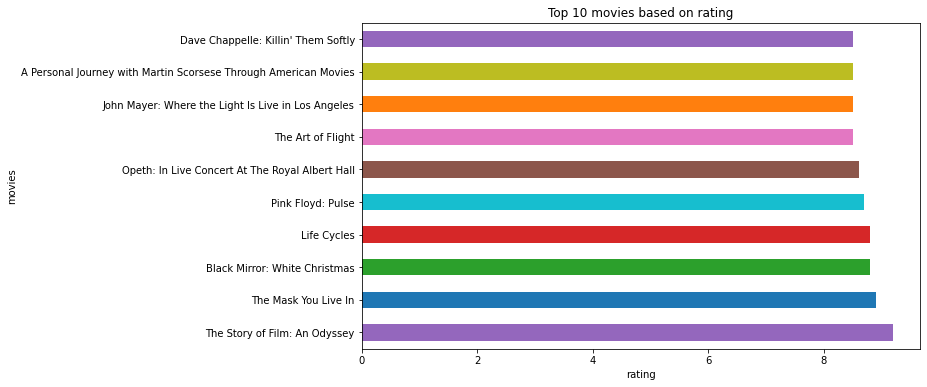

In [32]:
colors = ['#9467bd','#1f77b4', '#2ca02c', '#d62728', '#17becf' ,'#8c564b', '#e377c2', '#ff7f0e', '#bcbd22']
sort_film.head(10).plot(kind='barh',figsize=(10,6), color= colors)
#diagram-title
plt.title('Top 10 movies based on rating')
# x-axis
plt.xlabel('rating')
# y-axis
plt.ylabel('movies');

The third criteria of best movie is rating/vote_avg,The Story of Film:An Odyssey is the winner with 9.2

### Directors based on Rating

In [33]:
#Top 10 director based in Rating
top_director = tmbd.groupby('director').mean().vote_average
top_director

director
 FrÃ©dÃ©ric Jardin            5.9
A.R. Murugadoss               6.9
Aaron Aites                   6.5
Aaron Blaise|Robert Walker    6.8
Aaron Hann|Mario Miscione     6.1
                             ... 
Ã‡aÄŸan Irmak                 8.2
Ã‰mile Gaudreault             5.2
Ã‰ric Besnard                 5.1
Ã‰tienne Chatiliez            6.7
Ã€lex Pastor|David Pastor     5.7
Name: vote_average, Length: 5050, dtype: float64

In [34]:
#sorting director diascending based on vote-average/rating
sort_director = top_director.sort_values(ascending=False) 
sort_director

director
Mark Cousins                            9.2
Derek Frankowski                        8.8
David Mallet                            8.7
Martin Scorsese|Michael Henry Wilson    8.5
Curt Morgan                             8.5
                                       ... 
Justin Russell                          2.2
Lawrence Kasanoff                       2.2
James Nguyen                            2.1
Brett Kelly                             2.0
Harold P. Warren                        1.5
Name: vote_average, Length: 5050, dtype: float64

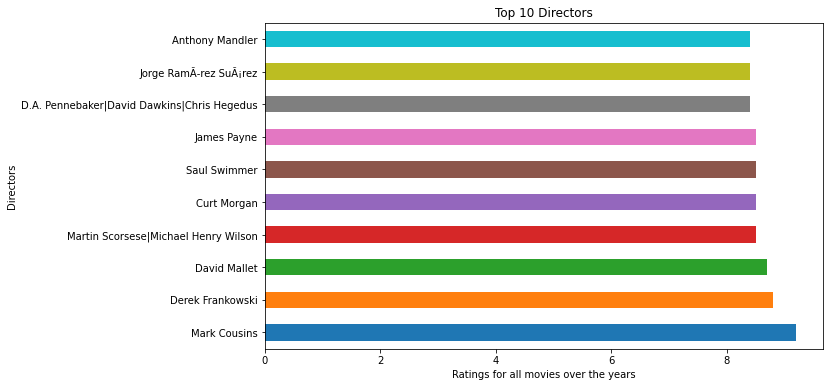

In [35]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sort_director.head(10).plot(kind='barh',figsize=(10,6), color= colors)
#diagram-title
plt.title('Top 10 Directors')
# x-axis
plt.xlabel('Ratings for all movies over the years')
# y-axis
plt.ylabel('Directors');


The best director based on rating is Mark Cousins with average vote of 9.2

### Most 20 successful genres

In [36]:
top_genres = pd.Series(tmbd['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
top_genres.head(20)


Drama              4751
Comedy             3782
Thriller           2905
Action             2382
Romance            1705
Horror             1629
Adventure          1470
Crime              1353
Family             1229
Science Fiction    1228
Fantasy             915
Mystery             808
Animation           699
Documentary         517
Music               401
History             334
War                 270
Foreign             187
Western             165
TV Movie            164
dtype: int64

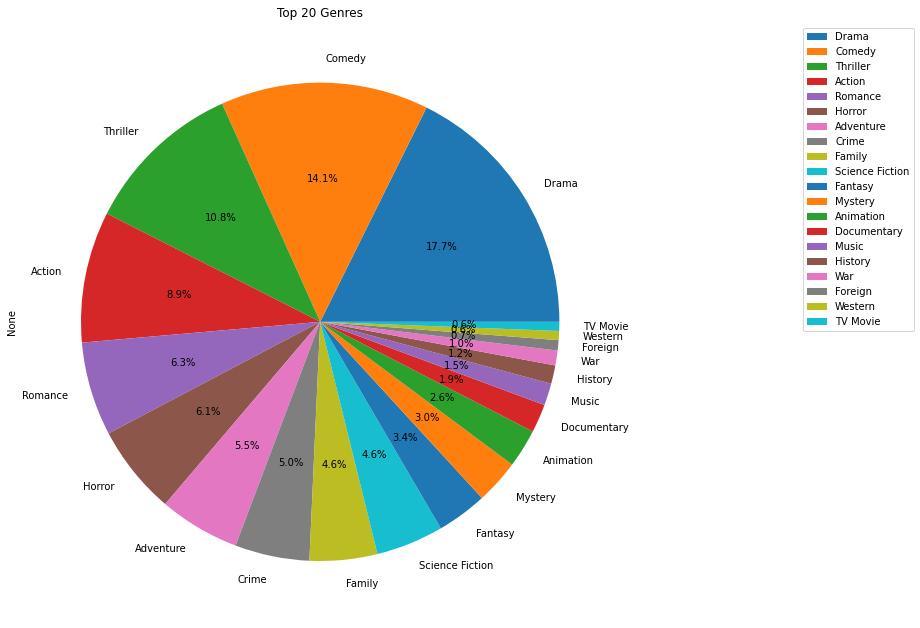

In [37]:
top_genres.head(20).plot(kind='pie',figsize=(11, 11),autopct='%1.1f%%' )
plt.title('Top 20 Genres')
plt.legend(loc=9, bbox_to_anchor=(1.4, 1));


Drama is the most success genres with 4751 movie (17.7%) 

### Most 10 cast has appeared 

In [38]:
top_cast = pd.Series(tmbd['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
top_cast.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Susan Sarandon       48
dtype: int64

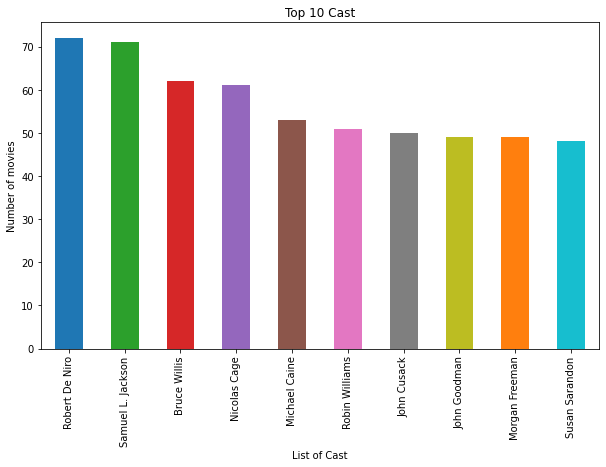

In [39]:
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#ff7f0e', '#17becf']
top_cast.head(10).plot(kind='bar',figsize=(10,6), color= colors)
plt.title('Top 10 Cast')
plt.xlabel('List of Cast')
plt.ylabel('Number of movies');

Roberto De Niro has the highest number of movies (72 movie)

### Chart represented the profits over the years

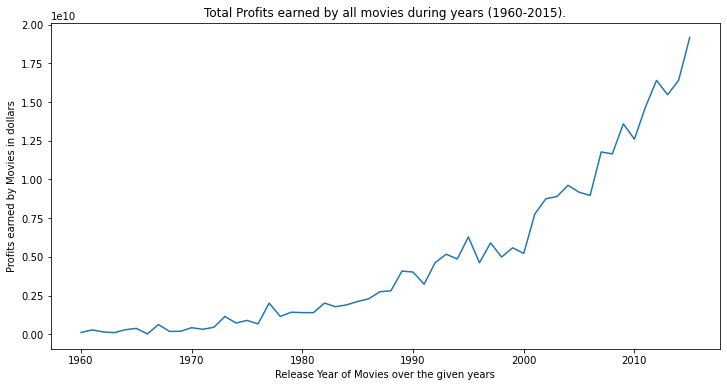

In [40]:

profit_years = tmbd.groupby('release_year')['profit'].sum()

plt.figure(figsize=(12,6))
#title of the line plot
plt.title('Total Profits earned by all movies during years (1960-2015).')
#x-axis
plt.xlabel('Release Year of Movies over the given years')
#oy-axis
plt.ylabel('Profits earned by Movies in dollars',)

#plotting the graph
plt.plot(profit_years);


The profit start on the period between (1970 and 1980),then continues to rise up untill reach the peak in 2015 with profits about 2e10

## Conclusion

From quesions1:
The highest one is avatar with profit of **2544505847** dollars
The lowest one is The Warrior's Way with profit of **-413912431** dollarrs.

From question2:
The average run time of movies **102.36** minutes.

From question3:
We can see that as the **popularity** increase ,the **revenue** increase.

From question4:
There isn’t any noticeable relation between **budget** and **profit**.

From question5:
Itcan be notice that the relationship between the ratings vs profit **rightly-biased**

From question6:
The results are different based on the three criteria.It can be notice that **Avatar movie** is #1 based on profits,while based on popularity **Jurassic World** wins,finally based on rating criteria **The story of film:An Odyssey** is #1.

From question7:
**Mark Cousins** is the best director based on vote_avg/rating,then **Derek Frankowski** while the third director is**David Mallet**.

From question8:
Drama is the most genres then comedy,thriller,action,…….,etc.

From question9:
The most actor has appered is **Robert De Niro** then **Samuel L. Jackson**,**Bruce Willis**,**Nicolas Cage** ,...etc.

From question10:
The profits **increasing** over the years.



### Limitations:
1. There are many null values that have been dropped which maybe could effect in the results.
2. Profits of the movies not given which we calculated first from the budget and the revenue.
3. The currency is not given and we assumed to be dollar,but maybe it is not.Therefore,the results of questions where currency is exist maybe not accurate.
4. The pipe (|) in (Genres and cast) must be splitted first.
5. We cannot say which movie is the top 1 because it depend on the criteria such as profit,rating and popularity.
6. We noticed there are some rows with zer value in budget and profit and wii definetly effect the statistics.